In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

/kaggle/input/kdd-cup-1999-data/kddcup.data.gz
/kaggle/input/kdd-cup-1999-data/training_attack_types
/kaggle/input/kdd-cup-1999-data/kddcup.data.corrected
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled.gz
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled.gz
/kaggle/input/kdd-cup-1999-data/corrected.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.names
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected
/kaggle/input/kdd-cup-1999-data/typo-correction.txt
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data/kddcup.data
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled/kddcup.testdata.unlabeled
/kaggle/input/kdd-cup-1999-data/corrected/corrected
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent/kddcup.testdata.unlabeled_10_percent
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled/kd

# Importing all required modules and listing the contents of given dataset..

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
print(os.listdir('../input/kdd-cup-1999-data'))
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder

['kddcup.data.gz', 'kddcup.data', 'kddcup.testdata.unlabeled', 'training_attack_types', 'kddcup.data.corrected', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'corrected', 'kddcup.testdata.unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent', 'corrected.gz', 'kddcup.newtestdata_10_percent_unlabeled', 'kddcup.data_10_percent.gz', 'kddcup.names', 'kddcup.data_10_percent_corrected', 'typo-correction.txt', 'kddcup.data_10_percent', 'kddcup.testdata.unlabeled_10_percent.gz']


### It shows that, there's handfull of usefull data in the dataset.

# Analysing the given dataset.

In [3]:
raw_data = pd.read_csv('/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected')
print(raw_data)

        0  tcp  http  SF  181  5450  0.1  0.2  0.3  0.4  ...  9.1  1.00.1  \
0       0  tcp  http  SF  239   486    0    0    0    0  ...   19     1.0   
1       0  tcp  http  SF  235  1337    0    0    0    0  ...   29     1.0   
2       0  tcp  http  SF  219  1337    0    0    0    0  ...   39     1.0   
3       0  tcp  http  SF  217  2032    0    0    0    0  ...   49     1.0   
4       0  tcp  http  SF  217  2032    0    0    0    0  ...   59     1.0   
...    ..  ...   ...  ..  ...   ...  ...  ...  ...  ...  ...  ...     ...   
494015  0  tcp  http  SF  310  1881    0    0    0    0  ...  255     1.0   
494016  0  tcp  http  SF  282  2286    0    0    0    0  ...  255     1.0   
494017  0  tcp  http  SF  203  1200    0    0    0    0  ...  255     1.0   
494018  0  tcp  http  SF  291  1200    0    0    0    0  ...  255     1.0   
494019  0  tcp  http  SF  219  1234    0    0    0    0  ...  255     1.0   

        0.00.6  0.11.1  0.00.7  0.00.8  0.00.9  0.00.10  0.00.11  normal.  

### Checking for null.

In [4]:
raw_data.isnull().sum()

0          0
tcp        0
http       0
SF         0
181        0
5450       0
0.1        0
0.2        0
0.3        0
0.4        0
0.5        0
1          0
0.6        0
0.7        0
0.8        0
0.9        0
0.10       0
0.11       0
0.12       0
0.13       0
0.14       0
0.15       0
8          0
8.1        0
0.00       0
0.00.1     0
0.00.2     0
0.00.3     0
1.00       0
0.00.4     0
0.00.5     0
9          0
9.1        0
1.00.1     0
0.00.6     0
0.11.1     0
0.00.7     0
0.00.8     0
0.00.9     0
0.00.10    0
0.00.11    0
normal.    0
dtype: int64

In [5]:
raw_data.columns

Index(['0', 'tcp', 'http', 'SF', '181', '5450', '0.1', '0.2', '0.3', '0.4',
       '0.5', '1', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13',
       '0.14', '0.15', '8', '8.1', '0.00', '0.00.1', '0.00.2', '0.00.3',
       '1.00', '0.00.4', '0.00.5', '9', '9.1', '1.00.1', '0.00.6', '0.11.1',
       '0.00.7', '0.00.8', '0.00.9', '0.00.10', '0.00.11', 'normal.'],
      dtype='object')

In [6]:
raw_data.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
raw_data.tail()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.


In [8]:
data = pd.read_csv('/kaggle/input/kdd-cup-1999-data/corrected/corrected')
print(data)

        0  udp  private  SF  105  146  0.1  0.2  0.3  0.4  ...  254  1.00.1  \
0       0  udp  private  SF  105  146    0    0    0    0  ...  254     1.0   
1       0  udp  private  SF  105  146    0    0    0    0  ...  254     1.0   
2       0  udp  private  SF  105  146    0    0    0    0  ...  254     1.0   
3       0  udp  private  SF  105  146    0    0    0    0  ...  254     1.0   
4       0  udp  private  SF  105  146    0    0    0    0  ...  255     1.0   
...    ..  ...      ...  ..  ...  ...  ...  ...  ...  ...  ...  ...     ...   
311023  0  udp  private  SF  105  147    0    0    0    0  ...  255     1.0   
311024  0  udp  private  SF  105  147    0    0    0    0  ...  255     1.0   
311025  0  udp  private  SF  105  147    0    0    0    0  ...  255     1.0   
311026  0  udp  private  SF  105  147    0    0    0    0  ...  255     1.0   
311027  0  udp  private  SF  105  147    0    0    0    0  ...  255     1.0   

        0.01  0.00.6  0.00.7  0.00.8  0.00.9  0.00.

In [9]:
data.columns

Index(['0', 'udp', 'private', 'SF', '105', '146', '0.1', '0.2', '0.3', '0.4',
       '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13',
       '0.14', '0.15', '0.16', '1', '1.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '255', '254', '1.00.1', '0.01',
       '0.00.6', '0.00.7', '0.00.8', '0.00.9', '0.00.10', '0.00.11',
       'normal.'],
      dtype='object')

## Importing all the dataset, excluding (.gz)

In [10]:
def load_data():
    
    f=open("../input/kdd-cup-1999-data/kddcup.names",'r')
    data=f.readlines()[1:]

    column_names=[]
    for line in data:
        column_names.append(line.split(':')[0])

    column_names.append('target')
    f.close()

    f=open("../input/kdd-cup-1999-data/training_attack_types","r")
    data=f.readlines()[:-1]

    attack_type_mapping={'normal':'normal'}
    for line in data:
        k,v=line.split()
        attack_type_mapping[k]=v

    f.close()

    temp=pd.read_csv('../input/kdd-cup-1999-data/kddcup.data_10_percent.gz',names=column_names)
    temp['target']=temp.target.apply(lambda r: attack_type_mapping[r[:-1]])
    
    return temp

In [11]:
set = load_data()
set.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')

In [12]:
set.isnull().sum()
print(set.head())

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3           

## Removing the duplicates from the given dataset.

In [13]:
(set.drop_duplicates(inplace=True))
print(set.shape)
print(set.columns)

(145585, 42)
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')


In [14]:
set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145585 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145585 non-null  int64  
 1   protocol_type                145585 non-null  object 
 2   service                      145585 non-null  object 
 3   flag                         145585 non-null  object 
 4   src_bytes                    145585 non-null  int64  
 5   dst_bytes                    145585 non-null  int64  
 6   land                         145585 non-null  int64  
 7   wrong_fragment               145585 non-null  int64  
 8   urgent                       145585 non-null  int64  
 9   hot                          145585 non-null  int64  
 10  num_failed_logins            145585 non-null  int64  
 11  logged_in                    145585 non-null  int64  
 12  num_compromised              145585 non-null  int64  
 13 

## By visualizing this given dataset we came to know that, there's only int and float data types were used.

In [15]:
set.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,145585.000000,1.455850e+05,1.455850e+05,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,...,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000
mean,132.026088,7.995754e+03,2.859800e+03,0.000137,0.020201,0.000048,0.100175,0.000515,0.491493,0.026177,...,181.469416,129.935563,0.553219,0.061389,0.092819,0.019048,0.291599,0.290980,0.110464,0.107676
std,1224.161209,1.820390e+06,6.081000e+04,0.011720,0.239369,0.010150,1.426803,0.028586,0.499929,3.311384,...,99.097409,114.714725,0.456236,0.147021,0.241112,0.060410,0.452493,0.453448,0.306098,0.304221
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,78.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.880000e+02,1.165000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.030000,0.020000,1.000000,1.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualizing using graphs.

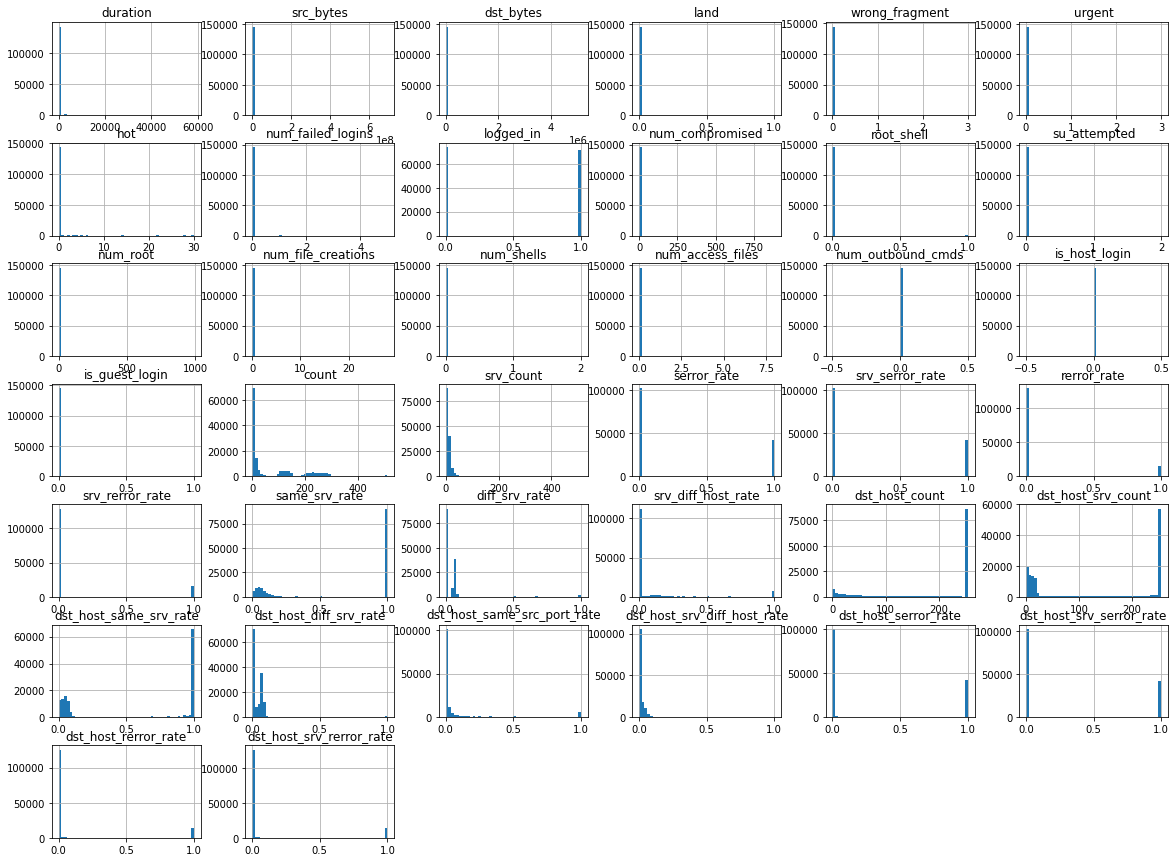

In [16]:
set.hist(bins=50, figsize=(20,15))
plt.show()

Category vise graphical representation


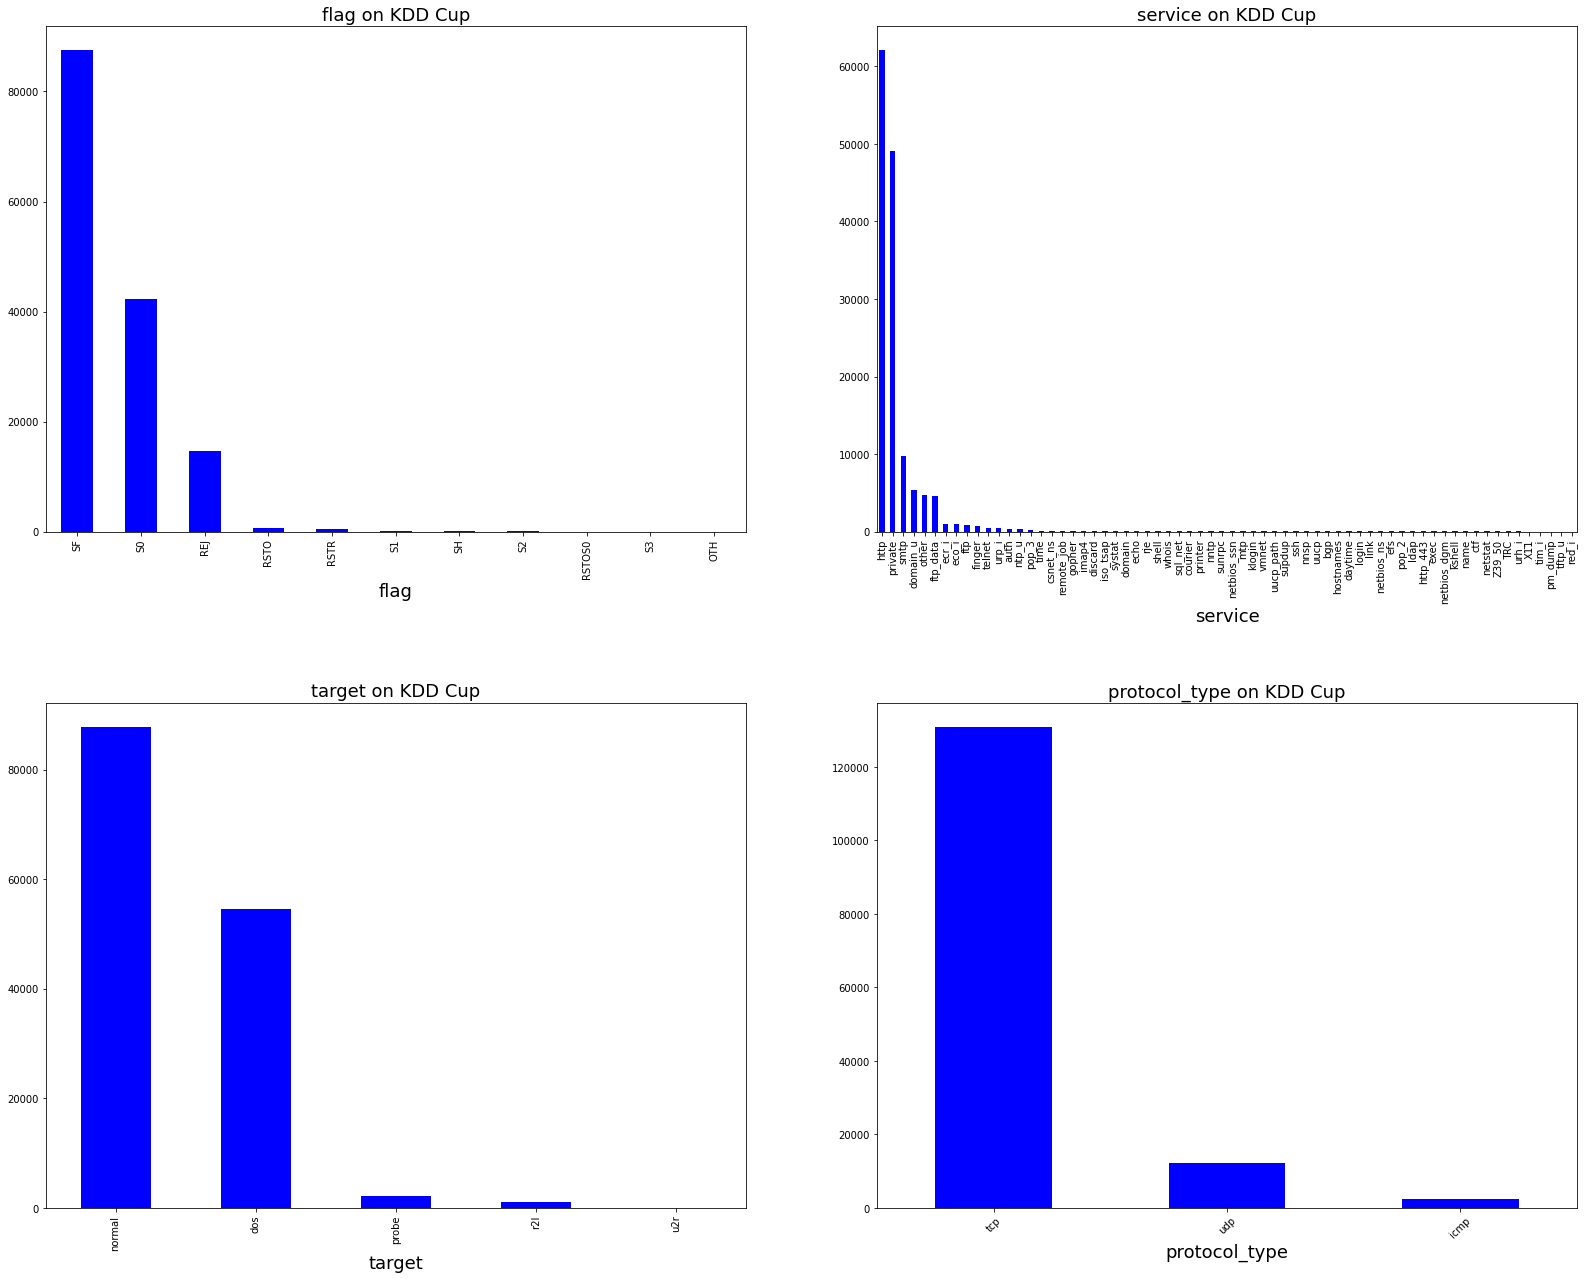

In [17]:
categorical_features = ['flag', 'service', 'target', 'protocol_type']
def plot_dist(col, ax):
    set[col].value_counts().plot(kind='bar', facecolor='b', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=18)
    ax.set_title("{} on KDD Cup".format(col), fontsize= 18)
    plt.xticks(rotation=45)
    return ax

f, ax = plt.subplots(2,2, figsize = (22,20))
f.tight_layout(h_pad=15, w_pad=10, rect=[0, 0.08, 1, 0.93])

k = 0
for i in range(2):
    for j in range(2):
        plot_dist(categorical_features[k], ax[i][j])
        k += 1

        
print('Category vise graphical representation')
plt.show()

In [18]:
print(set['target'].describe())
print(set['target'].value_counts())

count     145585
unique         5
top       normal
freq       87832
Name: target, dtype: object
normal    87832
dos       54572
probe      2130
r2l         999
u2r          52
Name: target, dtype: int64


## Creating a combined dataset for operations.

<AxesSubplot:>

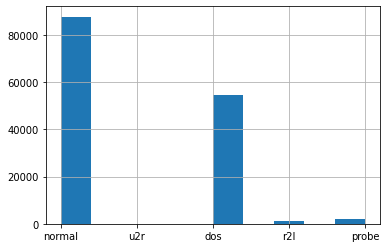

In [19]:
set['target'].hist()

# Training a specific model.

In [20]:
train_set,strat_test_set = train_test_split(set,test_size=0.2,random_state=42,stratify=set['target'])
strat_train_set,strat_val_set=train_test_split(train_set,test_size=0.2,random_state=42,stratify=train_set['target'])

In [21]:
strat_test_set["target"].value_counts() / len(strat_test_set)

normal    0.603290
dos       0.374867
probe     0.014631
r2l       0.006869
u2r       0.000343
Name: target, dtype: float64

## Discovering the given dataset deeply.

In [22]:
set = strat_train_set.copy()

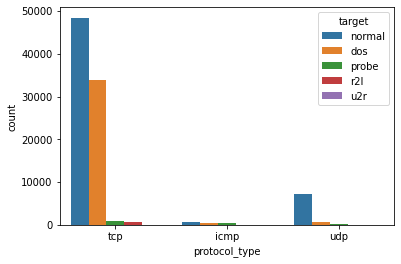

In [23]:
sns.countplot(x = 'protocol_type',hue = "target",data = set)
plt.show()

### This help us to know that there's various factors on which attacks depends.

Guest Login vs Traffic status
Influence of guest login


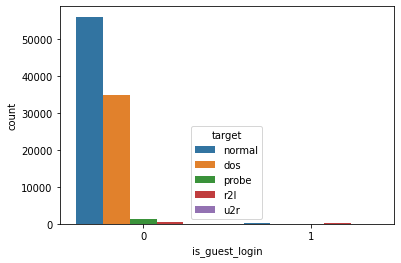

In [24]:
sns.countplot(x = 'is_guest_login',hue = "target",data = set)
print("Guest Login vs Traffic status")
print('Influence of guest login')
plt.show()

### By analysing the above two graphs we came to know that, Most of the UDP and tcp protocols denote the normal traffic. It also means that UDP and TCP are more vulnerable in compare with others. If it is not a guest login then more chance the traffic denotes DOS attack.

Land status vs Target


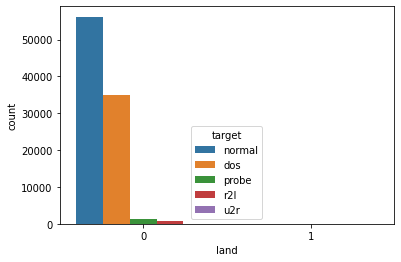

In [25]:
sns.countplot(x = 'land',hue = "target",data = set)
print("Land status vs Target")
plt.show()

# Correlations.

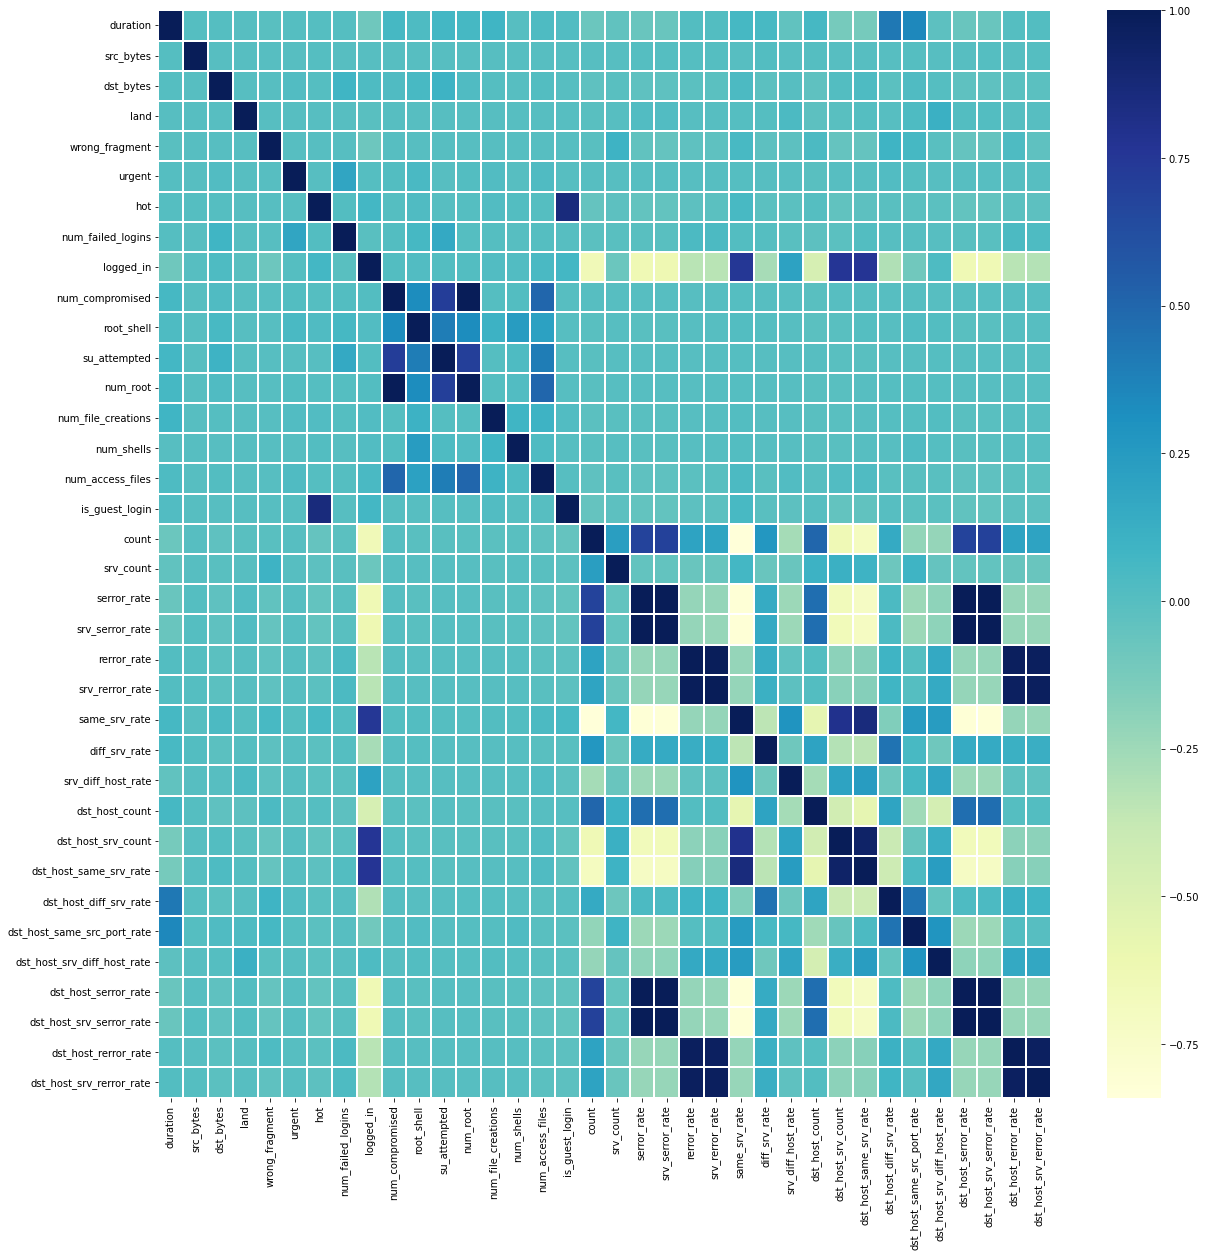

In [26]:
f, ax = plt.subplots(figsize =(20,20)) 

corr_matrix=set.drop(['num_outbound_cmds','is_host_login'],axis=1).corr()
sns.heatmap(corr_matrix,ax = ax,cmap ="YlGnBu", linewidths = 0.1)
plt.show()

# Dropping some columns of given dataset.

In [27]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
set.drop('num_root',axis = 1,inplace = True)

In [28]:
#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
set.drop('srv_serror_rate',axis = 1,inplace = True)

In [29]:
#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
set.drop('srv_rerror_rate',axis = 1, inplace=True)

In [30]:
#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
set.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

In [31]:
#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
set.drop('dst_host_serror_rate',axis = 1, inplace=True)

In [32]:
#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
set.drop('dst_host_rerror_rate',axis = 1, inplace=True)

In [33]:
#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
set.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

In [34]:
#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
set.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [35]:
#This variable has zeroes in all the instances so we are ignored for analyzsis.
set.drop(['num_outbound_cmds','is_host_login'],axis=1,inplace=True)

In [36]:
set.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
count,93174.000000,9.317400e+04,9.317400e+04,93174.000000,93174.000000,93174.000000,93174.000000,93174.000000,93174.000000,93174.000000,...,93174.000000,93174.000000,93174.000000,93174.000000,93174.000000,93174.000000,93174.000000,93174.000000,93174.000000,93174.000000
mean,137.375405,1.052716e+04,2.824274e+03,0.000140,0.020972,0.000075,0.101208,0.000537,0.490469,0.032949,...,0.290681,0.108824,0.655169,0.040977,0.093569,181.602250,130.010539,0.061776,0.093390,0.018955
std,1274.031639,2.273904e+06,5.778030e+04,0.011811,0.244437,0.012688,1.442182,0.027404,0.499912,4.034181,...,0.452587,0.309542,0.446660,0.121630,0.242736,99.042859,114.731749,0.147856,0.242285,0.059887
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.080000,0.000000,0.000000,78.000000,12.000000,0.000000,0.000000,0.000000
50%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,118.000000,0.020000,0.000000,0.000000
75%,0.000000,2.870000e+02,1.173000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,0.070000,0.030000,0.020000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,4.000000,1.000000,884.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000


In [37]:
set.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target
90308,0,tcp,http,SF,183,2333,0,0,0,0,...,0.0,1.00,0.00,0.0,5,255,0.00,0.20,0.02,normal
378975,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.06,0.05,0.0,255,8,0.05,0.00,0.00,dos
80287,0,tcp,http,SF,359,700,0,0,0,0,...,0.0,1.00,0.00,0.0,255,255,0.00,0.00,0.00,normal
481062,0,icmp,urp_i,SF,183,0,0,0,0,0,...,0.0,0.88,0.25,0.0,255,23,0.01,0.11,0.00,normal
349283,0,tcp,http,REJ,0,0,0,0,0,0,...,1.0,1.00,0.00,0.0,2,37,0.00,0.50,0.38,normal


## Finally we got 8 rows and 33 columns, so that we can do complex eqations quickly.

# Preparing data for ML algorithm.

In [38]:
set=strat_train_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)
set_labels=strat_train_set['target'].copy()

In [39]:
from sklearn.preprocessing import LabelEncoder

target_encoder=LabelEncoder()
target_encoder.fit(set_labels)
set_labels=target_encoder.transform(set_labels)

In [40]:
set_cat=set[['flag', 'service', 'protocol_type']]
set_cat.head(10)

,flag,service,protocol_type
90308,SF,http,tcp
378975,S0,private,tcp
80287,SF,http,tcp
481062,SF,urp_i,icmp
349283,REJ,http,tcp
357370,S0,private,tcp
23902,SF,http,tcp
78495,SF,http,tcp
460364,REJ,ssh,tcp
383565,S0,private,tcp


In [41]:
cat_encoder = OneHotEncoder()
set_cat_1hot = cat_encoder.fit_transform(set_cat)
set_cat_1hot

<93174x79 sparse matrix of type '<class 'numpy.float64'>'
	with 279522 stored elements in Compressed Sparse Row format>

In [42]:
print(set_cat_1hot.toarray())
print(set_cat_1hot.shape)
cat_encoder.categories_

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(93174, 79)


[array(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
        'SF', 'SH'], dtype=object),
 array(['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns',
        'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i',
        'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher',
        'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin',
        'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
        'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
        'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
        'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
        'sunrpc', 'supdup', 'systat', 'telnet', 'tim_i', 'time', 'urh_i',
        'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'], dtype=object),
 array(['icmp', 'tcp', 'udp'], dtype=object)]

# Out.

In [43]:
set_num=set.drop(['flag', 'service','protocol_type'],axis=1)
set_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
90308,0,183,2333,0,0,0,0,0,1,0,...,0.0,0.0,1.00,0.00,0.0,5,255,0.00,0.20,0.02
378975,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.06,0.05,0.0,255,8,0.05,0.00,0.00
80287,0,359,700,0,0,0,0,0,1,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,0.00,0.00
481062,0,183,0,0,0,0,0,0,0,0,...,0.0,0.0,0.88,0.25,0.0,255,23,0.01,0.11,0.00
349283,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.00,0.00,0.0,2,37,0.00,0.50,0.38


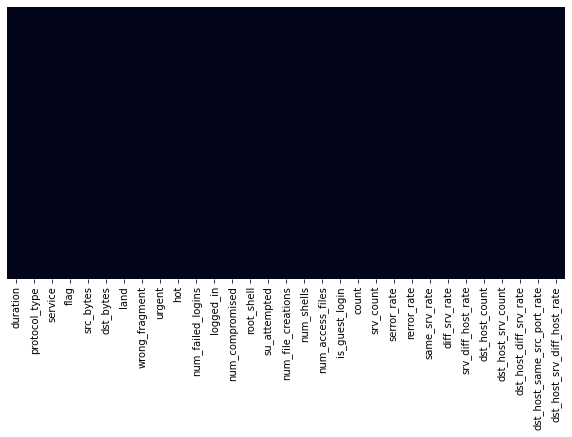

In [44]:
plt.figure(figsize=(10,5))
sns.heatmap(set.isnull(),yticklabels=False,cbar=False)

plt.show()

In [45]:
set_cat=set[['flag', 'service', 'protocol_type']]
set_cat.head(10)

,flag,service,protocol_type
90308,SF,http,tcp
378975,S0,private,tcp
80287,SF,http,tcp
481062,SF,urp_i,icmp
349283,REJ,http,tcp
357370,S0,private,tcp
23902,SF,http,tcp
78495,SF,http,tcp
460364,REJ,ssh,tcp
383565,S0,private,tcp


In [46]:
cat_encoder = OneHotEncoder()
set_cat_1hot = cat_encoder.fit_transform(set_cat)
set_cat_1hot

<93174x79 sparse matrix of type '<class 'numpy.float64'>'
	with 279522 stored elements in Compressed Sparse Row format>

In [47]:
print(set_cat_1hot.toarray())
print(set.info())
print(set.describe)
print(set_cat_1hot.shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 93174 entries, 90308 to 381505
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     93174 non-null  int64  
 1   protocol_type                93174 non-null  object 
 2   service                      93174 non-null  object 
 3   flag                         93174 non-null  object 
 4   src_bytes                    93174 non-null  int64  
 5   dst_bytes                    93174 non-null  int64  
 6   land                         93174 non-null  int64  
 7   wrong_fragment               93174 non-null  int64  
 8   urgent                       93174 non-null  int64  
 9   hot                          93174 non-null  int64  
 10  num_failed_logins            

# Visualizing the given dataset's category.

In [48]:
cat_encoder.categories_

[array(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
        'SF', 'SH'], dtype=object),
 array(['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns',
        'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i',
        'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher',
        'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin',
        'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
        'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
        'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
        'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
        'sunrpc', 'supdup', 'systat', 'telnet', 'tim_i', 'time', 'urh_i',
        'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'], dtype=object),
 array(['icmp', 'tcp', 'udp'], dtype=object)]

In [49]:
set_num=set.drop(['flag', 'service','protocol_type'],axis=1)
set_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
90308,0,183,2333,0,0,0,0,0,1,0,...,0.0,0.0,1.00,0.00,0.0,5,255,0.00,0.20,0.02
378975,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.06,0.05,0.0,255,8,0.05,0.00,0.00
80287,0,359,700,0,0,0,0,0,1,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,0.00,0.00
481062,0,183,0,0,0,0,0,0,0,0,...,0.0,0.0,0.88,0.25,0.0,255,23,0.01,0.11,0.00
349283,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.00,0.00,0.0,2,37,0.00,0.50,0.38


In [50]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest()
outlier_pred = isolation_forest.fit_predict(set_num)

set_clean = set[outlier_pred == 1]
set_labels_clean = set_labels[outlier_pred == 1]

In [51]:
# Only for verifying.
#print(set_clean.shape)
#print(set_labels_clean.shape)

### Transforming Pipeline

In [52]:
from sklearn.preprocessing import StandardScaler

standadizer=StandardScaler()
set_num_tr=standadizer.fit_transform(set_num)
set_num_tr

array([[-0.10782789, -0.0045491 , -0.00850249, ..., -0.41781426,
         0.44001943,  0.01745376],
       [-0.10782789, -0.00462958, -0.04887979, ..., -0.07964627,
        -0.38545887, -0.31650996],
       [-0.10782789, -0.0044717 , -0.03676487, ..., -0.41781426,
        -0.38545887, -0.31650996],
       ...,
       [-0.10782789, -0.00462958, -0.04887979, ...,  0.05562093,
        -0.38545887, -0.31650996],
       [-0.10782789, -0.0042694 , -0.04311655, ...,  3.64020168,
         0.44001943,  0.01745376],
       [-0.10782789, -0.00462958, -0.04887979, ...,  0.19088813,
        -0.38545887, -0.31650996]])

### Transforming column.

In [53]:
from sklearn.compose import ColumnTransformer

num_attribs = list(set_num)
cat_attribs = ['flag', 'service','protocol_type']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

set_prepared = full_pipeline.fit_transform(set_clean)
set_labels=set_labels_clean.copy()

In [54]:
from collections import Counter
Counter(set_labels)

# To check the Counter starting from 0 to 5.

Counter({1: 52689, 0: 33538, 3: 277, 2: 163, 4: 15})

## A binary classification.

In [55]:
set_bin_labels=(set_labels==1).astype(np.int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [56]:
from sklearn.linear_model import LogisticRegression

sgd_clf=LogisticRegression(penalty='l1',solver='liblinear')
sgd_clf.fit(set_prepared,set_bin_labels)

LogisticRegression(penalty='l1', solver='liblinear')

In [57]:
from sklearn.metrics import confusion_matrix

set_predictions=sgd_clf.predict(set_prepared)
confusion_matrix(set_bin_labels,set_predictions)

array([[33850,   143],
       [   36, 52653]])

In [58]:
x_val=strat_val_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)
y_val=strat_val_set['target'].copy()

x_val_prepared=full_pipeline.transform(x_val)
validation_prediction=sgd_clf.predict(x_val_prepared)

y_val=target_encoder.transform(y_val)
y_bin_val=(y_val==1).astype(np.int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


In [59]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(y_bin_val,validation_prediction))
print(precision_score(y_bin_val,validation_prediction))
print(recall_score(y_bin_val,validation_prediction))
confusion_matrix(y_bin_val,validation_prediction)

0.9857044732549154
0.9846686449060337
0.9917455347612609


array([[ 9024,   217],
       [  116, 13937]])

### Selecting and training a model.

In [60]:
from sklearn.linear_model import LogisticRegression

softmax_reg=LogisticRegression(multi_class='multinomial',max_iter=1000)
softmax_reg.fit(set_prepared,set_labels)

LogisticRegression(max_iter=1000, multi_class='multinomial')

##### Prediction.

In [61]:
some_data = set.iloc[:5]
some_labels = set_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", softmax_reg.predict(some_data_prepared))
print("labels:", list(some_labels))

Predictions: [1 0 1 1 2]
labels: [1, 0, 1, 1, 0]


In [62]:
# Confusion matrix.
from sklearn.metrics import confusion_matrix

set_predictions=softmax_reg.predict(set_prepared)
confusion_matrix(set_labels,set_predictions)

array([[33524,    14,     0,     0,     0],
       [   10, 52666,     6,     6,     1],
       [    4,    35,   124,     0,     0],
       [    0,    34,     0,   243,     0],
       [    0,     6,     0,     2,     7]])

In [63]:
# KNN classifier.

from sklearn.neighbors import KNeighborsClassifier

neigh_clf = KNeighborsClassifier()
neigh_clf.fit(set_prepared,set_labels)

KNeighborsClassifier()

In [64]:
from sklearn.metrics import confusion_matrix

set_predictions=neigh_clf.predict(set_prepared)
confusion_matrix(set_labels,set_predictions)

array([[33530,     7,     1,     0,     0],
       [    6, 52667,     3,    13,     0],
       [    3,    16,   144,     0,     0],
       [    0,    15,     0,   262,     0],
       [    0,    11,     0,     2,     2]])

### Evaluating the model.

In [65]:
x_val=strat_val_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)

y_val=strat_val_set['target'].copy()

x_val_prepared=full_pipeline.transform(x_val)
y_val=target_encoder.transform(y_val)

In [66]:
validation_prediction=softmax_reg.predict(x_val_prepared)

In [67]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(y_val,validation_prediction))
print(precision_score(y_val,validation_prediction,average='weighted'))
print(recall_score(y_val,validation_prediction,average='weighted'))
confusion_matrix(y_val,validation_prediction)

0.9781488795397957
0.9773132479051848
0.9781488795397957


array([[ 8565,   153,    14,     0,     0],
       [   24, 13947,    77,     3,     2],
       [  117,    26,   195,     3,     0],
       [   48,    35,     1,    72,     4],
       [    0,     2,     0,     0,     6]])

#### Validating the predictions.

In [68]:
validation_prediction=neigh_clf.predict(x_val_prepared)

In [69]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(y_val,validation_prediction))
print(precision_score(y_val,validation_prediction,average='weighted'))
print(recall_score(y_val,validation_prediction,average='weighted'))
confusion_matrix(y_val,validation_prediction)

0.9736412810165708
0.9728014100777742
0.9736412810165708


array([[ 8486,   244,     2,     0,     0],
       [    2, 14035,    12,     4,     0],
       [    8,   249,    84,     0,     0],
       [    1,    84,     1,    74,     0],
       [    0,     6,     0,     1,     1]])

### Fine tuning the trained model.

#### By analysing the above two model we came to know that Softmax is more efficient as compared to KNN.

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

params_grid=[
    {
        'penalty' : ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'multi_class' : ['multinomial'],
        'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter' : [400]
    },
    {
        'penalty' : ['l1'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'multi_class' : ['multinomial'],
        'solver' : ['saga'],
        'max_iter' : [400]
    }
]

grid_search=GridSearchCV(softmax_reg,params_grid,cv=3,verbose=2,n_jobs=-1)
grid_search.fit(set_prepared,set_labels)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial'),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'max_iter': [400], 'multi_class': ['multinomial'],
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'max_iter': [400], 'multi_class': ['multinomial'],
                          'penalty': ['l1'], 'solver': ['saga']}],
             verbose=2)

In [71]:
best_params,best_score=grid_search.best_params_,grid_search.best_score_
best_params,best_score

({'C': 1000,
  'max_iter': 400,
  'multi_class': 'multinomial',
  'penalty': 'l2',
  'solver': 'lbfgs'},
 0.998500265337671)

### Evaluation.

In [72]:
x_test=strat_test_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)

y_test=strat_test_set['target'].copy()

x_test_prepared=full_pipeline.transform(x_test)
y_test=target_encoder.transform(y_test)

In [73]:
test_prediction=grid_search.best_estimator_.predict(x_test_prepared)
f1_score(y_test,test_prediction,average='weighted')

0.9777620929750681

# Nearly 98% efficiency.